# Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import std

# Preprocess of Data:

In [2]:
train_data, train_labels = np.loadtxt('train1.txt', unpack=True)
test_data, test_labels = np.loadtxt('test1.txt', unpack=True)

# Implementation of ANN:
Implement an artificial neural network (ANN) regressor and learn its weights implementing the backpropagation algorithm. Your implementation should support an ANN for linear regression (no hidden layer) and an ANN with a single hidden layer. In your implementation,

* Use the sum of the squared errors as your loss function,
* Use sigmoid as your activation function to define the hidden units, and
* Use the stochastic learning algorithm.

After implementing your ANN regressors, test them on the dataset provided on the course web page. The instances in this dataset have 1-D inputs and 1-D outputs (so that you will easily plot and see what your ANNs learn). The dataset is provided as two text files (train1, test1). An individual line of each file corresponds to an instance where the first number corresponds to the input and the next one corresponds to the output.

# Linear Regressor (No Hidden Layer):

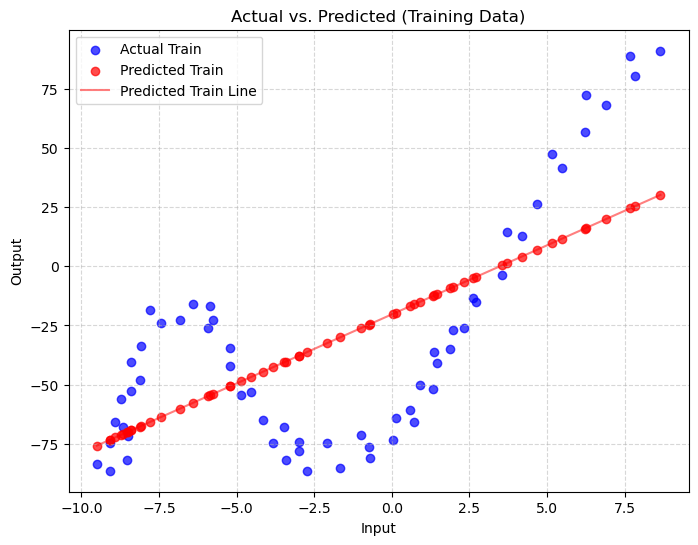

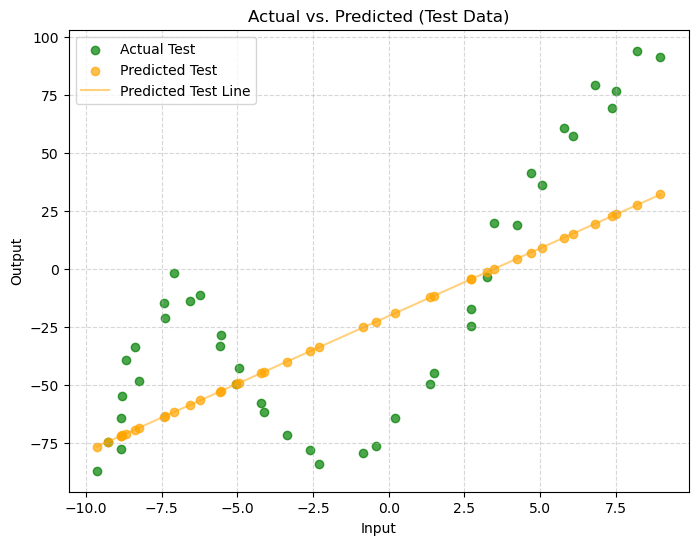

Train R^2 Score: 0.4815080293253343
Test R^2 Score: 0.5195469400671812


In [3]:
class ANNRegressor:
    def __init__(self, n_inputs, n_outputs):
        self.weights = np.full((n_inputs, n_outputs), 0.5)
        self.bias = np.full((1, n_outputs), 0.5)

    def forward_propagation(self, x):
        self.output = np.dot(x, self.weights) + self.bias
        return self.output

    def backward_propagation(self, x, y, learning_rate):
        error = y - self.output

        d_weights = np.dot(x.T, error)
        d_bias = error

        self.weights += learning_rate * d_weights
        self.bias += learning_rate * d_bias

    def train(self, train_data, train_labels, epochs, learning_rate):
        for epoch in range(epochs):
            for (x, y) in zip(train_data, train_labels):
                x = np.array([x])
                y = np.array([y])
                self.forward_propagation(x)
                self.backward_propagation(x, y, learning_rate)

    def predict(self, x):
        return self.forward_propagation(x)

# Example usage
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

ann = ANNRegressor(n_inputs=1, n_outputs=1)  # No hidden layer
ann.train(train_data, train_labels, epochs=50, learning_rate=0.001)

train_predictions = np.array([ann.predict(np.array([x])) for x in train_data]).reshape(-1, 1)
test_predictions = np.array([ann.predict(np.array([x])) for x in test_data]).reshape(-1, 1)

# Create a combined array of train/test_data and predictions
train_combined = np.hstack((train_data, train_predictions))
test_combined = np.hstack((test_data, test_predictions))

# Sort the combined array by the first column (test_data)
train_combined = train_combined[train_combined[:, 0].argsort()]
test_combined = test_combined[test_combined[:, 0].argsort()]

# Plot for training data
plt.figure(figsize=(8, 6))

# Plot actual data as points
plt.scatter(train_data, train_labels, color='blue', label='Actual Train', alpha=0.7)

# Plot predicted data as points
plt.scatter(train_data, train_predictions, color='red', label='Predicted Train', alpha=0.7)

# Plot predicted data as a smooth curve
plt.plot(train_combined[:, 0], train_combined[:, 1], color='red', label='Predicted Train Line', alpha=0.5)

# Labels, title, legend, and grid
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs. Predicted (Training Data)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('train_linreg.png')

# Display the plot
plt.show()

# Plot for test data
plt.figure(figsize=(8, 6))

# Plot actual data as points
plt.scatter(test_data, test_labels, color='green', label='Actual Test', alpha=0.7)

# Plot predicted data as points
plt.scatter(test_data, test_predictions, color='orange', label='Predicted Test', alpha=0.7)

# Plot predicted data as a smooth curve
plt.plot(test_combined[:, 0], test_combined[:, 1], color='orange', label='Predicted Test Line', alpha=0.5)

# Labels, title, legend, and grid
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs. Predicted (Test Data)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('test_linreg.png')

# Display the plot
plt.show()

train_labels = np.array(train_labels).reshape(-1)
train_predictions = np.array(train_predictions).reshape(-1)

SS_res_train = np.sum((train_labels - train_predictions) ** 2)
SS_tot_train = np.sum((train_labels - np.mean(train_labels)) ** 2)
r2_train = 1 - (SS_res_train / SS_tot_train)

test_labels = np.array(test_labels).reshape(-1)
test_predictions = np.array(test_predictions).reshape(-1)

SS_res_test = np.sum((test_labels - test_predictions) ** 2)
SS_tot_test = np.sum((test_labels - np.mean(test_labels)) ** 2)
r2_test = 1 - (SS_res_test / SS_tot_test)

print(f'Train R^2 Score: {r2_train}')
print(f'Test R^2 Score: {r2_test}')


# Linear Regression for ANN with one hidden layer:

Epoch 1/1500, Average Loss: 3406.203782192739
Epoch 2/1500, Average Loss: 3272.827923984788
Epoch 3/1500, Average Loss: 3156.409063782514
Epoch 4/1500, Average Loss: 3052.8000372454117
Epoch 5/1500, Average Loss: 2959.3370046477917
Epoch 6/1500, Average Loss: 2873.9547543853387
Epoch 7/1500, Average Loss: 2794.914463501604
Epoch 8/1500, Average Loss: 2720.6517523882203
Epoch 9/1500, Average Loss: 2649.654692635842
Epoch 10/1500, Average Loss: 2580.386534178093
Epoch 11/1500, Average Loss: 2511.4717626717083
Epoch 12/1500, Average Loss: 2442.729248293446
Epoch 13/1500, Average Loss: 2376.0842461794427
Epoch 14/1500, Average Loss: 2312.5898216961605
Epoch 15/1500, Average Loss: 2251.540625481662
Epoch 16/1500, Average Loss: 2192.672282827513
Epoch 17/1500, Average Loss: 2135.9471009150443
Epoch 18/1500, Average Loss: 2081.29635825014
Epoch 19/1500, Average Loss: 2028.6340389221878
Epoch 20/1500, Average Loss: 1977.8723477574067
Epoch 21/1500, Average Loss: 1928.926421227947
Epoch 22/1500

Epoch 198/1500, Average Loss: 444.0441249959629
Epoch 199/1500, Average Loss: 564.8409807295907
Epoch 200/1500, Average Loss: 553.319808374668
Epoch 201/1500, Average Loss: 433.22162399140296
Epoch 202/1500, Average Loss: 566.3998666092889
Epoch 203/1500, Average Loss: 548.2416780533623
Epoch 204/1500, Average Loss: 499.3887154402831
Epoch 205/1500, Average Loss: 438.0736153829024
Epoch 206/1500, Average Loss: 575.9663051712831
Epoch 207/1500, Average Loss: 572.0313555620401
Epoch 208/1500, Average Loss: 567.1890316022564
Epoch 209/1500, Average Loss: 504.27468184693777
Epoch 210/1500, Average Loss: 571.6666720089647
Epoch 211/1500, Average Loss: 535.3704402088032
Epoch 212/1500, Average Loss: 472.07660984999427
Epoch 213/1500, Average Loss: 569.4704355251523
Epoch 214/1500, Average Loss: 497.6728396903766
Epoch 215/1500, Average Loss: 466.79263091782775
Epoch 216/1500, Average Loss: 572.5918205470924
Epoch 217/1500, Average Loss: 553.4718044471447
Epoch 218/1500, Average Loss: 491.584

Epoch 390/1500, Average Loss: 486.92486553210364
Epoch 391/1500, Average Loss: 521.5643569281455
Epoch 392/1500, Average Loss: 591.0629110615149
Epoch 393/1500, Average Loss: 574.5694609719001
Epoch 394/1500, Average Loss: 515.674920061177
Epoch 395/1500, Average Loss: 521.9080007162539
Epoch 396/1500, Average Loss: 599.96922649082
Epoch 397/1500, Average Loss: 498.1752360351367
Epoch 398/1500, Average Loss: 545.4125470495027
Epoch 399/1500, Average Loss: 443.0446849174193
Epoch 400/1500, Average Loss: 602.5339878305834
Epoch 401/1500, Average Loss: 490.6928710432911
Epoch 402/1500, Average Loss: 507.43647792060347
Epoch 403/1500, Average Loss: 603.4550751302883
Epoch 404/1500, Average Loss: 528.4527122344251
Epoch 405/1500, Average Loss: 468.55485373819903
Epoch 406/1500, Average Loss: 602.1404707646205
Epoch 407/1500, Average Loss: 471.3210976742987
Epoch 408/1500, Average Loss: 599.0939773855524
Epoch 409/1500, Average Loss: 534.3468540865499
Epoch 410/1500, Average Loss: 508.780643

Epoch 596/1500, Average Loss: 533.1422822960732
Epoch 597/1500, Average Loss: 470.00912947208445
Epoch 598/1500, Average Loss: 604.8321091944799
Epoch 599/1500, Average Loss: 535.0923815477499
Epoch 600/1500, Average Loss: 517.3321558586862
Epoch 601/1500, Average Loss: 509.0004068987431
Epoch 602/1500, Average Loss: 605.439753218617
Epoch 603/1500, Average Loss: 459.4319431206554
Epoch 604/1500, Average Loss: 598.1178650410691
Epoch 605/1500, Average Loss: 532.4646601820014
Epoch 606/1500, Average Loss: 475.4667470546932
Epoch 607/1500, Average Loss: 604.9776055264513
Epoch 608/1500, Average Loss: 534.6466178415922
Epoch 609/1500, Average Loss: 515.1656216170098
Epoch 610/1500, Average Loss: 483.7684948646331
Epoch 611/1500, Average Loss: 597.7992004648369
Epoch 612/1500, Average Loss: 534.207454954233
Epoch 613/1500, Average Loss: 512.9812909847166
Epoch 614/1500, Average Loss: 549.9927832948459
Epoch 615/1500, Average Loss: 442.2154759243018
Epoch 616/1500, Average Loss: 603.8101858

Epoch 806/1500, Average Loss: 515.6227279301404
Epoch 807/1500, Average Loss: 508.51022624439724
Epoch 808/1500, Average Loss: 431.7798804048598
Epoch 809/1500, Average Loss: 606.8837710459651
Epoch 810/1500, Average Loss: 532.9289673578284
Epoch 811/1500, Average Loss: 439.0485899970174
Epoch 812/1500, Average Loss: 605.7024137665629
Epoch 813/1500, Average Loss: 521.6544455588197
Epoch 814/1500, Average Loss: 496.8896033564441
Epoch 815/1500, Average Loss: 562.0707675831551
Epoch 816/1500, Average Loss: 468.44011219937846
Epoch 817/1500, Average Loss: 603.924363036715
Epoch 818/1500, Average Loss: 511.0682403981156
Epoch 819/1500, Average Loss: 489.80868429119323
Epoch 820/1500, Average Loss: 594.1622747731789
Epoch 821/1500, Average Loss: 504.7578002227413
Epoch 822/1500, Average Loss: 578.7213564143195
Epoch 823/1500, Average Loss: 473.9002399643839
Epoch 824/1500, Average Loss: 603.7297300849262
Epoch 825/1500, Average Loss: 530.3515269587671
Epoch 826/1500, Average Loss: 450.0004

Epoch 1023/1500, Average Loss: 507.8008226996488
Epoch 1024/1500, Average Loss: 599.1768270478294
Epoch 1025/1500, Average Loss: 535.5629302800078
Epoch 1026/1500, Average Loss: 467.4856595686802
Epoch 1027/1500, Average Loss: 604.0905691145955
Epoch 1028/1500, Average Loss: 491.15016599977173
Epoch 1029/1500, Average Loss: 544.5880080598503
Epoch 1030/1500, Average Loss: 442.8961487995284
Epoch 1031/1500, Average Loss: 604.7563812731695
Epoch 1032/1500, Average Loss: 531.3243701165586
Epoch 1033/1500, Average Loss: 434.73460919407415
Epoch 1034/1500, Average Loss: 603.8717931120183
Epoch 1035/1500, Average Loss: 484.1426615880817
Epoch 1036/1500, Average Loss: 586.4429149088986
Epoch 1037/1500, Average Loss: 535.7556252565446
Epoch 1038/1500, Average Loss: 472.1228411067495
Epoch 1039/1500, Average Loss: 602.8548725222058
Epoch 1040/1500, Average Loss: 495.9456848684865
Epoch 1041/1500, Average Loss: 546.2440857434024
Epoch 1042/1500, Average Loss: 443.8343581773099
Epoch 1043/1500, A

Epoch 1231/1500, Average Loss: 471.2136619482083
Epoch 1232/1500, Average Loss: 597.2814856202654
Epoch 1233/1500, Average Loss: 532.1312734131893
Epoch 1234/1500, Average Loss: 510.73738790407754
Epoch 1235/1500, Average Loss: 549.5630094410838
Epoch 1236/1500, Average Loss: 447.00484939221315
Epoch 1237/1500, Average Loss: 598.1342622715612
Epoch 1238/1500, Average Loss: 533.4233809743655
Epoch 1239/1500, Average Loss: 512.361754828066
Epoch 1240/1500, Average Loss: 541.6573458213256
Epoch 1241/1500, Average Loss: 507.29683982115404
Epoch 1242/1500, Average Loss: 497.0622794489126
Epoch 1243/1500, Average Loss: 566.7467478916467
Epoch 1244/1500, Average Loss: 597.4651952298119
Epoch 1245/1500, Average Loss: 534.1029428882645
Epoch 1246/1500, Average Loss: 514.3163434833456
Epoch 1247/1500, Average Loss: 545.9631045509884
Epoch 1248/1500, Average Loss: 431.43530935487826
Epoch 1249/1500, Average Loss: 601.9568984743552
Epoch 1250/1500, Average Loss: 532.519822949272
Epoch 1251/1500, A

Epoch 1420/1500, Average Loss: 601.5390760787478
Epoch 1421/1500, Average Loss: 534.6949535627291
Epoch 1422/1500, Average Loss: 514.2102520570937
Epoch 1423/1500, Average Loss: 542.2656316294141
Epoch 1424/1500, Average Loss: 509.73997016718926
Epoch 1425/1500, Average Loss: 543.0553289740435
Epoch 1426/1500, Average Loss: 442.7889638586259
Epoch 1427/1500, Average Loss: 604.5145407602209
Epoch 1428/1500, Average Loss: 534.9789970689656
Epoch 1429/1500, Average Loss: 511.85339392920935
Epoch 1430/1500, Average Loss: 548.3970399204918
Epoch 1431/1500, Average Loss: 476.1632076889247
Epoch 1432/1500, Average Loss: 605.2754155925212
Epoch 1433/1500, Average Loss: 534.0759439007368
Epoch 1434/1500, Average Loss: 496.80548823683336
Epoch 1435/1500, Average Loss: 528.7972768569996
Epoch 1436/1500, Average Loss: 528.6049698143393
Epoch 1437/1500, Average Loss: 598.811414895104
Epoch 1438/1500, Average Loss: 467.37330783825115
Epoch 1439/1500, Average Loss: 602.5658825962323
Epoch 1440/1500, 

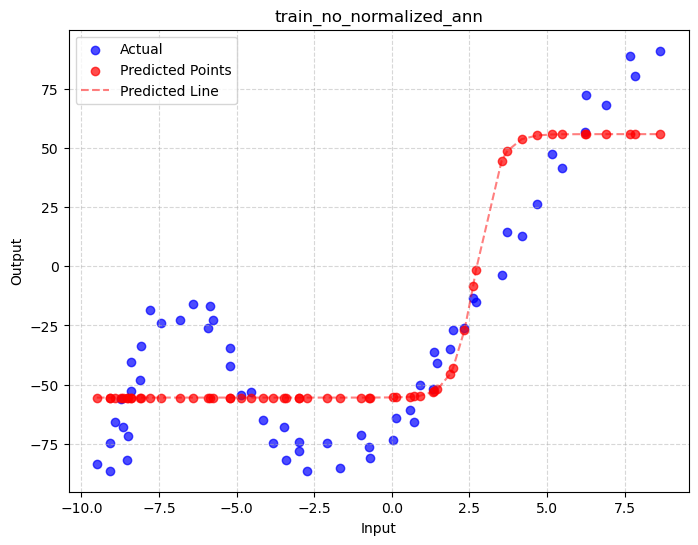

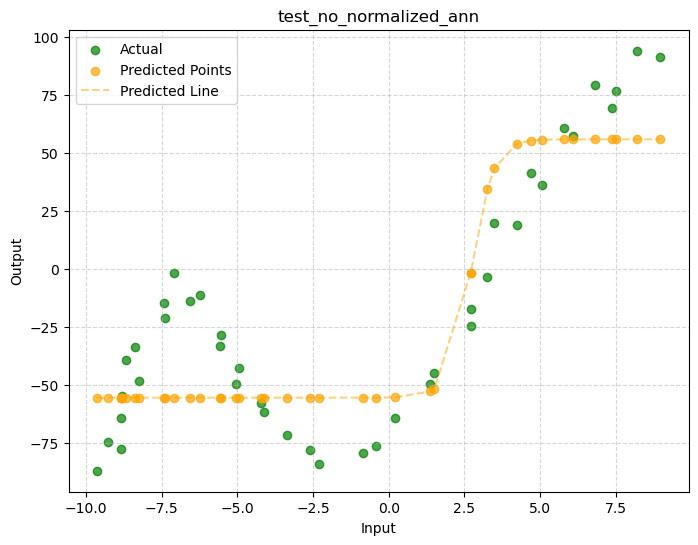

R^2 Score: 0.7863273933508006


In [4]:
class ANNRegressor:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.weights1 = np.full((n_inputs, n_hidden), 0.99)
        self.bias1 = np.full((1, n_hidden), 0.99)
        self.weights2 = np.full((n_hidden, n_outputs), 0.99)
        self.bias2 = np.full((1, n_outputs), 0.99)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, x):
        self.hidden_layer_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.output = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        return self.output

    def backward_propagation(self, x, y, learning_rate):
        error = y - self.output

        d_weights2 = np.dot(self.hidden_layer_output.T, error)
        d_bias2 = error

        d_hidden_layer = np.dot(error, self.weights2.T)
        d_hidden_layer *= self.sigmoid_derivative(self.hidden_layer_output)

        d_weights1 = np.dot(x.T, d_hidden_layer)
        d_bias1 = np.sum(d_hidden_layer, axis=0)

        self.weights1 += learning_rate * d_weights1
        self.bias1 += learning_rate * d_bias1
        self.weights2 += learning_rate * d_weights2
        self.bias2 += learning_rate * d_bias2

    def train(self, train_data, train_labels, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0.0
            for i in range(len(train_data)):
                x = np.array([train_data[i]])
                y = np.array([train_labels[i]])
                self.forward_propagation(x)
                self.backward_propagation(x, y, learning_rate)
                total_loss += np.sum((y - self.output) ** 2)

            avg_loss = total_loss / len(train_data)
            print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {avg_loss}")

    def predict(self, x):
        return self.forward_propagation(x)

# Assume train_data, train_labels, test_data, test_labels are provided
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

ann = ANNRegressor(n_inputs=1, n_hidden=2, n_outputs=1)
epochs = 1500
learning_rate = 0.001

ann.train(train_data, train_labels, epochs, learning_rate)

# Prediction for train and test data
train_predictions = np.array([ann.predict(np.array([x]))[0] for x in train_data])
test_predictions = np.array([ann.predict(np.array([x]))[0] for x in test_data])

def plot_data(data, labels, predictions, title, color_actual='blue', color_predicted='red'):
    # Create a combined array of data and predictions
    combined = np.hstack((data, predictions))

    # Sort the combined array by the first column (data)
    combined = combined[combined[:, 0].argsort()]

    plt.figure(figsize=(8, 6))

    # Plot actual data as points
    plt.scatter(data, labels, color=color_actual, label='Actual', alpha=0.7)

    # Plot predicted data as points
    plt.scatter(data, predictions, color=color_predicted, label='Predicted Points', alpha=0.7)

    # Plot predicted data as a smooth curve
    plt.plot(combined[:, 0], combined[:, 1], color=color_predicted, label='Predicted Line', alpha=0.5, linestyle='dashed')

    # Labels, title, legend, and grid
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the figure
    plt.savefig(f'{title}.png')

    # Display the plot
    plt.show()

plot_data(train_data, train_labels, train_predictions, 'train_no_normalized_ann')
plot_data(test_data, test_labels, test_predictions, 'test_no_normalized_ann', color_actual='green', color_predicted='orange')

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
test_labels = test_labels.reshape(-1)
test_predictions = test_predictions.flatten()

SS_res = np.sum((test_labels - test_predictions) ** 2)
SS_tot = np.sum((test_labels - np.mean(test_labels)) ** 2)

r2 = 1 - (SS_res / SS_tot)
print(f'R^2 Score: {r2}')

# Normalization Applied:

In [5]:
train_data_min = np.min(train_data)
train_data_max = np.max(train_data)
train_data = (train_data - train_data_min) / (train_data_max - train_data_min)

test_data_min = np.min(test_data)
test_data_max = np.max(test_data)
test_data = (test_data - test_data_min) / (test_data_max - test_data_min)

# After Normalization:

Epoch 1/1500, Average Train Loss: 3684.388943095028, Average Test Loss: 3019.12163766987
Epoch 101/1500, Average Train Loss: 1160.9719433906207, Average Test Loss: 1638.6681166091823
Epoch 201/1500, Average Train Loss: 655.9198865330058, Average Test Loss: 937.7162371246549
Epoch 301/1500, Average Train Loss: 465.9890208998242, Average Test Loss: 656.4923708552483
Epoch 401/1500, Average Train Loss: 400.2894654099781, Average Test Loss: 552.3425610824631
Epoch 501/1500, Average Train Loss: 376.54002480070915, Average Test Loss: 511.3096812910387
Epoch 601/1500, Average Train Loss: 367.49466379253437, Average Test Loss: 493.8086497628696
Epoch 701/1500, Average Train Loss: 363.8908957565097, Average Test Loss: 485.70943886837097
Epoch 801/1500, Average Train Loss: 362.3934384206393, Average Test Loss: 481.6304867914074
Epoch 901/1500, Average Train Loss: 361.7401005725574, Average Test Loss: 479.3882777101574
Epoch 1001/1500, Average Train Loss: 361.43521153220377, Average Test Loss: 47

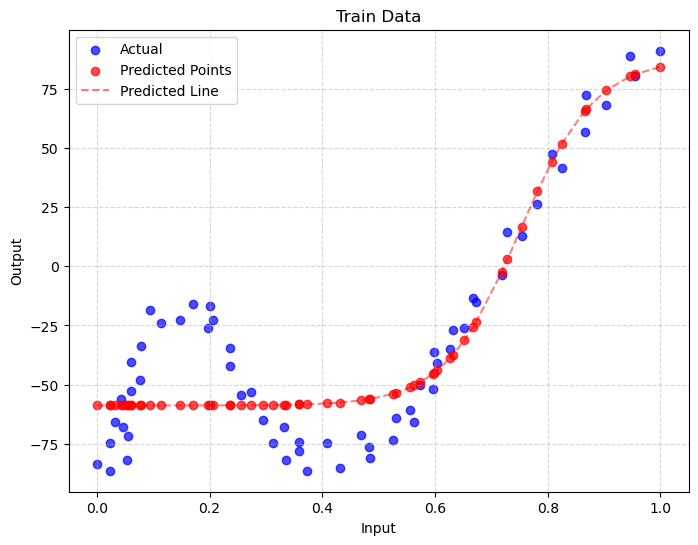

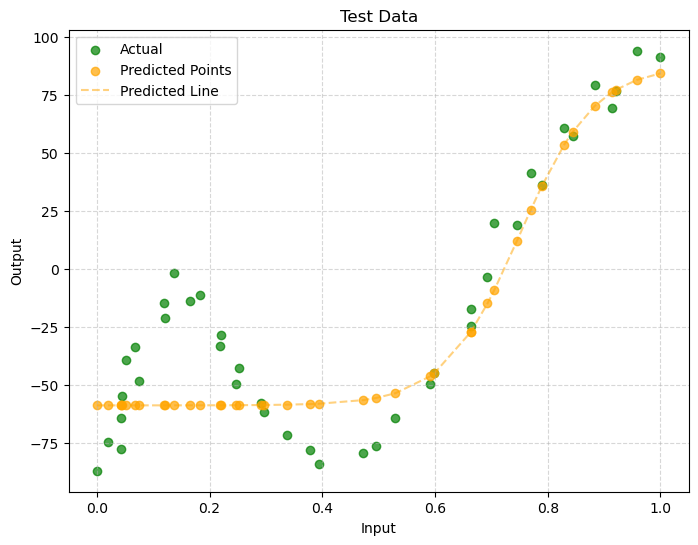

R^2 Score: 0.8323821044301598


In [6]:
class ANNRegressor:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.weights1 = np.full((n_inputs, n_hidden), 0.99)
        self.bias1 = np.full((1, n_hidden), 0.01)
        self.weights2 = np.full((n_hidden, n_outputs), 0.99)
        self.bias2 = np.full((1, n_outputs), 0.01)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, x):
        self.hidden_layer_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.output = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        return self.output

    def backward_propagation(self, x, y, learning_rate):
        error = y - self.output

        d_weights2 = np.dot(self.hidden_layer_output.T, error)
        d_bias2 = error

        d_hidden_layer = np.dot(error, self.weights2.T)
        d_hidden_layer *= self.sigmoid_derivative(self.hidden_layer_output)

        d_weights1 = np.dot(x.T, d_hidden_layer)
        d_bias1 = np.sum(d_hidden_layer, axis=0)

        self.weights1 += learning_rate * d_weights1
        self.bias1 += learning_rate * d_bias1
        self.weights2 += learning_rate * d_weights2
        self.bias2 += learning_rate * d_bias2

    def train(self, train_data, train_labels, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0.0
            for i in range(len(train_data)):
                x = np.array([train_data[i]])
                y = np.array([train_labels[i]])
                self.forward_propagation(x)
                self.backward_propagation(x, y, learning_rate)
                total_loss += np.sum((y - self.output) ** 2)

            avg_train_loss = total_loss / len(train_data)
            
            total_loss = 0.0
            for i in range(len(test_data)):
                x = np.array([test_data[i]])
                y = np.array([test_labels[i]])
                self.forward_propagation(x)
                total_loss += np.sum((y - self.output) ** 2)
            
            avg_test_loss = total_loss / len(test_data)

            if epoch % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Average Train Loss: {avg_train_loss}, Average Test Loss: {avg_test_loss}")

    def predict(self, x):
        return self.forward_propagation(x)

train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

ann = ANNRegressor(n_inputs=1, n_hidden=32, n_outputs=1)
epochs = 1500
learning_rate = 0.001

ann.train(train_data, train_labels, epochs, learning_rate)

train_predictions = np.array([ann.predict(np.array([x]))[0] for x in train_data])
test_predictions = np.array([ann.predict(np.array([x]))[0] for x in test_data])

def plot_data(data, labels, predictions, title, color_actual='blue', color_predicted='red'):
    combined = np.hstack((data, predictions))

    combined = combined[combined[:, 0].argsort()]

    plt.figure(figsize=(8, 6))

    plt.scatter(data, labels, color=color_actual, label='Actual', alpha=0.7)

    plt.scatter(data, predictions, color=color_predicted, label='Predicted Points', alpha=0.7)

    plt.plot(combined[:, 0], combined[:, 1], color=color_predicted, label='Predicted Line', alpha=0.5, linestyle='dashed')

    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.savefig(f'{title}.png')

    plt.show()

plot_data(train_data, train_labels, train_predictions, 'Train Data')
plot_data(test_data, test_labels, test_predictions, 'Test Data', color_actual='green', color_predicted='orange')

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
test_labels = test_labels.reshape(-1)
test_predictions = test_predictions.flatten()

SS_res = np.sum((test_labels - test_predictions) ** 2)
SS_tot = np.sum((test_labels - np.mean(test_labels)) ** 2)

r2 = 1 - (SS_res / SS_tot)
print(f'R^2 Score: {r2}')


# Different hidden units at the same time.

In [7]:
train_data, train_labels = np.loadtxt('train1.txt', unpack=True)
test_data, test_labels = np.loadtxt('test1.txt', unpack=True)

Epoch 1/600, Average Train Loss: 3136.6168162538684, Average Test Loss: 2888.349411092612
Epoch 101/600, Average Train Loss: 838.1165674585424, Average Test Loss: 1014.4763373891891
Epoch 201/600, Average Train Loss: 837.3795685317195, Average Test Loss: 1013.0592034357286
Epoch 301/600, Average Train Loss: 836.0509424342516, Average Test Loss: 1011.7021925419813
Epoch 401/600, Average Train Loss: 836.5602058722877, Average Test Loss: 976.1256307050995
Epoch 501/600, Average Train Loss: 833.667016664554, Average Test Loss: 1007.9703145678887
Epoch 1/600, Average Train Loss: 3186.598203632342, Average Test Loss: 2934.2566756304386
Epoch 101/600, Average Train Loss: 806.7385593711484, Average Test Loss: 889.6693746938167
Epoch 201/600, Average Train Loss: 624.2192149224321, Average Test Loss: 823.683352072118
Epoch 301/600, Average Train Loss: 640.0066120607861, Average Test Loss: 667.3280329190146
Epoch 401/600, Average Train Loss: 602.9992137795355, Average Test Loss: 707.196414415933


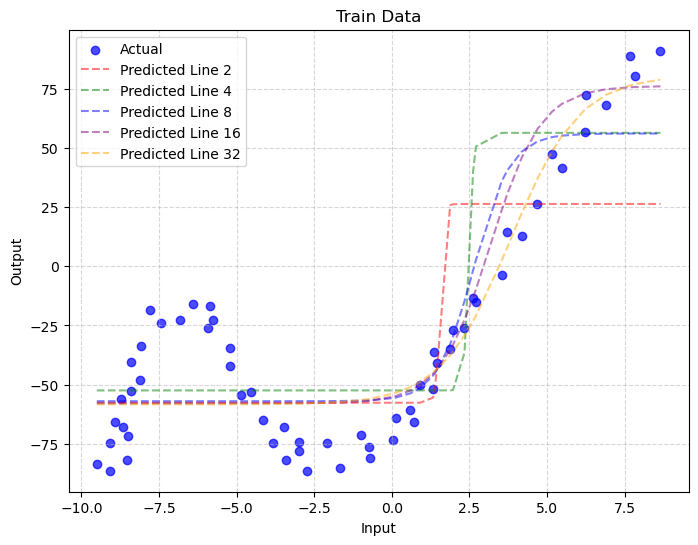

For 2 hidden units, Train Standard Deviation: 28.79583943516397, Test Standard Deviation: 30.196762225077794
For 4 hidden units, Train Standard Deviation: 25.418265116797212, Test Standard Deviation: 29.843098312998038
For 8 hidden units, Train Standard Deviation: 21.459274361996744, Test Standard Deviation: 24.144146374614447
For 16 hidden units, Train Standard Deviation: 20.061149057741073, Test Standard Deviation: 22.359917667780216
For 32 hidden units, Train Standard Deviation: 18.820049776490087, Test Standard Deviation: 20.736097765623565


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import std

class ANNRegressor:
    def __init__(self, n_inputs, n_hidden, n_outputs, initial_weight):
        self.weights1 = np.full((n_inputs, n_hidden), initial_weight)
        self.bias1 = np.full((1, n_hidden), initial_weight)
        self.weights2 = np.full((n_hidden, n_outputs), initial_weight)
        self.bias2 = np.full((1, n_outputs), initial_weight)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, x):
        self.hidden_layer_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.output = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        return self.output

    def backward_propagation(self, x, y, learning_rate):
        error = y - self.output

        d_weights2 = np.dot(self.hidden_layer_output.T, error)
        d_bias2 = error

        d_hidden_layer = np.dot(error, self.weights2.T)
        d_hidden_layer *= self.sigmoid_derivative(self.hidden_layer_output)

        d_weights1 = np.dot(x.T, d_hidden_layer)
        d_bias1 = np.sum(d_hidden_layer, axis=0)

        self.weights1 += learning_rate * d_weights1
        self.bias1 += learning_rate * d_bias1
        self.weights2 += learning_rate * d_weights2
        self.bias2 += learning_rate * d_bias2

    def train(self, train_data, train_labels, test_data, test_labels, epochs, learning_rate):
        for epoch in range(epochs):
            
            total_loss = 0.0
            for i in range(len(train_data)):
                x = np.array([train_data[i]])
                y = np.array([train_labels[i]])
                self.forward_propagation(x)
                self.backward_propagation(x, y, learning_rate)
                total_loss += np.sum((y - self.output) ** 2)
                
            avg_loss = total_loss / len(train_data)
                
            total_loss = 0.0
            for i in range(len(test_data)):
                x = np.array([test_data[i]])
                y = np.array([test_labels[i]])
                self.forward_propagation(x)
                total_loss += np.sum((y - self.output) ** 2)
            
            avg_test_loss = total_loss / len(test_data)

            if epoch % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Average Train Loss: {avg_loss}, Average Test Loss: {avg_test_loss}")
       
    def predict(self, x):
        return self.forward_propagation(x)

# Assume train_data, train_labels, test_data, and test_labels are provided
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

hidden_units = [2, 4, 8, 16, 32]
colors = ['red', 'green', 'blue', 'purple', 'orange']

epochs = 600

# Plot for train data
plt.figure(figsize=(8, 6))
plt.scatter(train_data, train_labels, color='blue', label='Actual', alpha=0.7)

learning_rates = [0.005, 0.004, 0.003, 0.002, 0.001]
initial_weights = [0.5, 0.6, 0.7, 0.8, 0.9]

train_std_devs = []
test_std_devs = []

for i, hidden_unit in enumerate(hidden_units):
    learning_rate = learning_rates[i]
    initial_weight = initial_weights[i]
    
    ann = ANNRegressor(n_inputs=1, n_hidden=hidden_unit, n_outputs=1, initial_weight=initial_weight)
    ann.train(train_data, train_labels, test_data, test_labels, epochs, learning_rate)
    train_predictions = np.array([ann.predict(np.array([x]))[0] for x in train_data])
    test_predictions = np.array([ann.predict(np.array([x]))[0] for x in test_data])

    train_std_dev = std(train_labels - train_predictions)
    test_std_dev = std(test_labels - test_predictions)

    train_std_devs.append(train_std_dev)
    test_std_devs.append(test_std_dev)

    # Create a combined array of train_data and predictions
    combined = np.hstack((train_data, train_predictions))

    # Sort the combined array by the first column (train_data)
    combined = combined[combined[:, 0].argsort()]

    # Plot predicted data as a smooth curve
    plt.plot(combined[:, 0], combined[:, 1], color=colors[i], label=f'Predicted Line {hidden_unit}', alpha=0.5, linestyle='dashed')

# Labels, title, legend, and grid
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Train Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('246832_ann_train.png')

# Display the plot
plt.show()

# Print out the standard deviations
for i, hidden_unit in enumerate(hidden_units):
    print(f"For {hidden_unit} hidden units, Train Standard Deviation: {train_std_devs[i]}, Test Standard Deviation: {test_std_devs[i]}")


Epoch 1/1200, Average Train Loss: 3136.6168162538684, Average Test Loss: 2888.349411092612
Epoch 101/1200, Average Train Loss: 838.1165674585424, Average Test Loss: 1014.4763373891891
Epoch 201/1200, Average Train Loss: 837.3795685317195, Average Test Loss: 1013.0592034357286
Epoch 301/1200, Average Train Loss: 836.0509424342516, Average Test Loss: 1011.7021925419813
Epoch 401/1200, Average Train Loss: 836.5602058722877, Average Test Loss: 976.1256307050995
Epoch 501/1200, Average Train Loss: 833.667016664554, Average Test Loss: 1007.9703145678887
Epoch 601/1200, Average Train Loss: 837.1494917726728, Average Test Loss: 1013.3030724985597
Epoch 701/1200, Average Train Loss: 835.6486708073775, Average Test Loss: 1011.6406228991084
Epoch 801/1200, Average Train Loss: 746.4742130980587, Average Test Loss: 888.601223729397
Epoch 901/1200, Average Train Loss: 762.2261489440676, Average Test Loss: 902.6443941200544
Epoch 1001/1200, Average Train Loss: 613.575286143063, Average Test Loss: 716

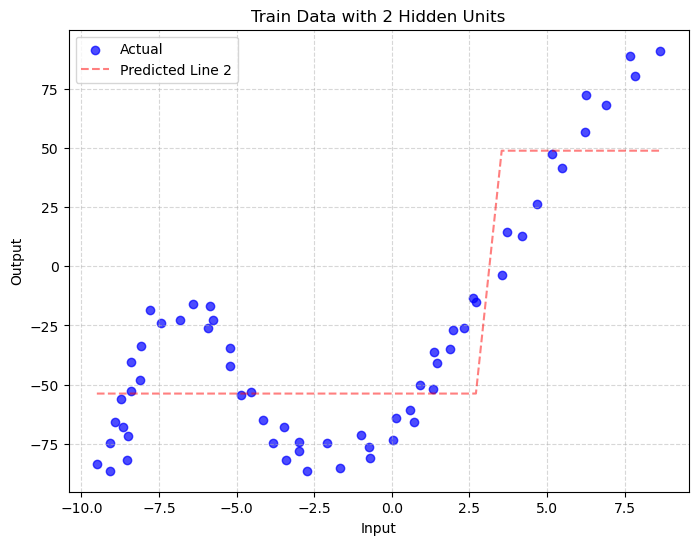

Epoch 1/1200, Average Train Loss: 3186.598203632342, Average Test Loss: 2934.2566756304386
Epoch 101/1200, Average Train Loss: 806.7385593711484, Average Test Loss: 889.6693746938167
Epoch 201/1200, Average Train Loss: 624.2192149224321, Average Test Loss: 823.683352072118
Epoch 301/1200, Average Train Loss: 640.0066120607861, Average Test Loss: 667.3280329190146
Epoch 401/1200, Average Train Loss: 602.9992137795355, Average Test Loss: 707.196414415933
Epoch 501/1200, Average Train Loss: 626.3594183391135, Average Test Loss: 684.5615607203246
Epoch 601/1200, Average Train Loss: 635.7898796933431, Average Test Loss: 893.2212424865834
Epoch 701/1200, Average Train Loss: 558.1421388542095, Average Test Loss: 905.9478646045758
Epoch 801/1200, Average Train Loss: 568.5341216925416, Average Test Loss: 674.8142047293729
Epoch 901/1200, Average Train Loss: 568.3449086179651, Average Test Loss: 672.8030885022774
Epoch 1001/1200, Average Train Loss: 562.3716645238256, Average Test Loss: 670.1126

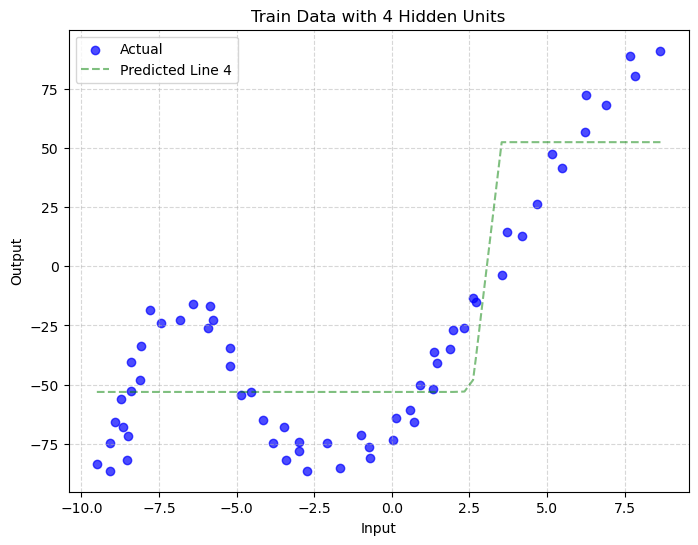

Epoch 1/1200, Average Train Loss: 3238.766855138271, Average Test Loss: 3000.169193896185
Epoch 101/1200, Average Train Loss: 494.9716026572487, Average Test Loss: 594.5913958804261
Epoch 201/1200, Average Train Loss: 505.6507440859073, Average Test Loss: 660.7157368870202
Epoch 301/1200, Average Train Loss: 452.51362298131903, Average Test Loss: 569.1208633953088
Epoch 401/1200, Average Train Loss: 422.81558408506254, Average Test Loss: 620.3862024713999
Epoch 501/1200, Average Train Loss: 438.5147102292595, Average Test Loss: 556.4171347858587
Epoch 601/1200, Average Train Loss: 490.33786747361876, Average Test Loss: 515.8360375971874
Epoch 701/1200, Average Train Loss: 486.6591099098469, Average Test Loss: 562.7619842146092
Epoch 801/1200, Average Train Loss: 486.66490889432913, Average Test Loss: 588.1071016599843
Epoch 901/1200, Average Train Loss: 495.687741275752, Average Test Loss: 543.9954280953298
Epoch 1001/1200, Average Train Loss: 495.2971272124031, Average Test Loss: 544.

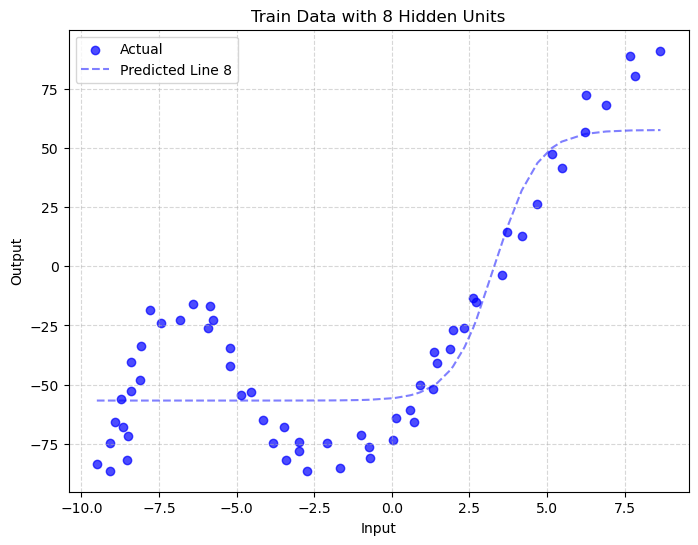

Epoch 1/1200, Average Train Loss: 3309.8217728276586, Average Test Loss: 3059.0557365909212
Epoch 101/1200, Average Train Loss: 376.54603237984725, Average Test Loss: 501.77692556417554
Epoch 201/1200, Average Train Loss: 376.56752570522013, Average Test Loss: 501.99681410087595
Epoch 301/1200, Average Train Loss: 376.5675511266579, Average Test Loss: 501.9971270625976
Epoch 401/1200, Average Train Loss: 376.56755125341317, Average Test Loss: 501.9971286917685
Epoch 501/1200, Average Train Loss: 376.567551254112, Average Test Loss: 501.99712870076524
Epoch 601/1200, Average Train Loss: 376.5675512541176, Average Test Loss: 501.9971287008169
Epoch 701/1200, Average Train Loss: 376.5675512541166, Average Test Loss: 501.99712870081817
Epoch 801/1200, Average Train Loss: 376.5675512541166, Average Test Loss: 501.99712870081817
Epoch 901/1200, Average Train Loss: 376.5675512541166, Average Test Loss: 501.99712870081817
Epoch 1001/1200, Average Train Loss: 376.5675512541166, Average Test Los

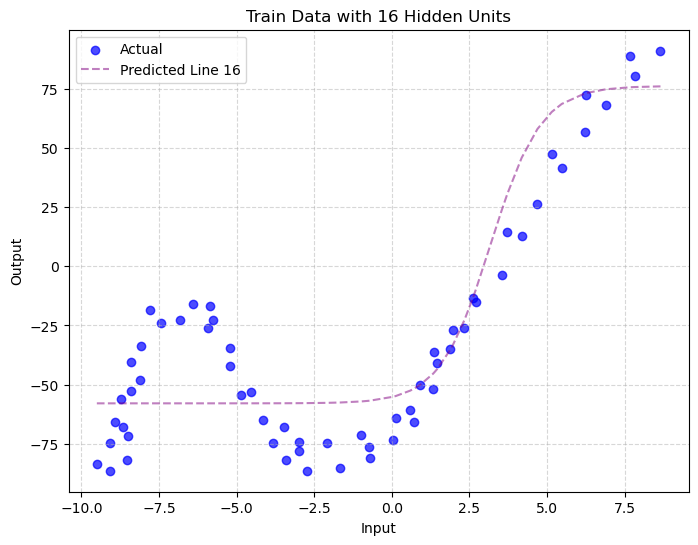

Epoch 1/1200, Average Train Loss: 3527.7346414949343, Average Test Loss: 3021.1230373632507
Epoch 101/1200, Average Train Loss: 356.02772730487834, Average Test Loss: 443.03619579023496
Epoch 201/1200, Average Train Loss: 353.9735678513532, Average Test Loss: 453.46530026525767
Epoch 301/1200, Average Train Loss: 353.9361692669972, Average Test Loss: 454.3524283047273
Epoch 401/1200, Average Train Loss: 353.93390542116254, Average Test Loss: 454.43048069835163
Epoch 501/1200, Average Train Loss: 353.9337179455235, Average Test Loss: 454.4371957725017
Epoch 601/1200, Average Train Loss: 353.93370192114287, Average Test Loss: 454.437771632713
Epoch 701/1200, Average Train Loss: 353.9337005477979, Average Test Loss: 454.43782099979876
Epoch 801/1200, Average Train Loss: 353.9337004300713, Average Test Loss: 454.4378252317847
Epoch 901/1200, Average Train Loss: 353.93370041997883, Average Test Loss: 454.4378255945704
Epoch 1001/1200, Average Train Loss: 353.9337004191138, Average Test Loss

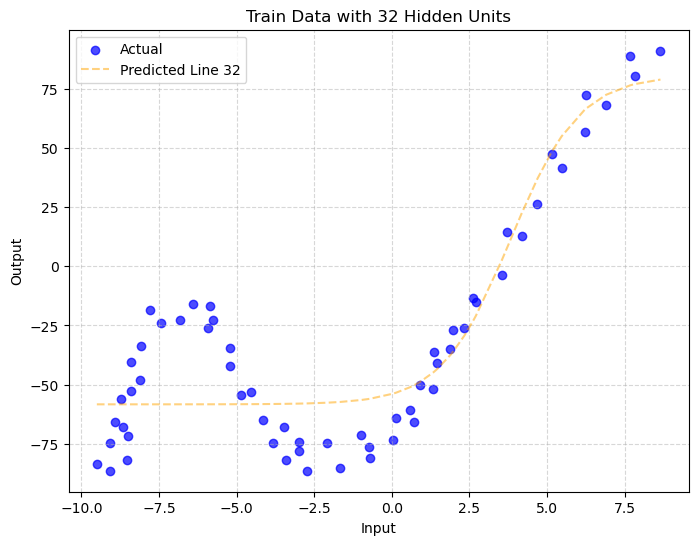

For 2 hidden units, Train Standard Deviation: 24.65775947577317, Test Standard Deviation: 25.958801602772557
For 4 hidden units, Train Standard Deviation: 24.224451105609212, Test Standard Deviation: 25.585407767448103
For 8 hidden units, Train Standard Deviation: 20.085973007648843, Test Standard Deviation: 21.56306727637429
For 16 hidden units, Train Standard Deviation: 20.06114905774102, Test Standard Deviation: 22.359917667780216
For 32 hidden units, Train Standard Deviation: 18.820049767191474, Test Standard Deviation: 20.73609837475532


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import std

class ANNRegressor:
    def __init__(self, n_inputs, n_hidden, n_outputs, initial_weight):
        self.weights1 = np.full((n_inputs, n_hidden), initial_weight)
        self.bias1 = np.full((1, n_hidden), initial_weight)
        self.weights2 = np.full((n_hidden, n_outputs), initial_weight)
        self.bias2 = np.full((1, n_outputs), initial_weight)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, x):
        self.hidden_layer_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.output = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        return self.output

    def backward_propagation(self, x, y, learning_rate):
        error = y - self.output

        d_weights2 = np.dot(self.hidden_layer_output.T, error)
        d_bias2 = error

        d_hidden_layer = np.dot(error, self.weights2.T)
        d_hidden_layer *= self.sigmoid_derivative(self.hidden_layer_output)

        d_weights1 = np.dot(x.T, d_hidden_layer)
        d_bias1 = np.sum(d_hidden_layer, axis=0)

        self.weights1 += learning_rate * d_weights1
        self.bias1 += learning_rate * d_bias1
        self.weights2 += learning_rate * d_weights2
        self.bias2 += learning_rate * d_bias2

    def train(self, train_data, train_labels, test_data, test_labels, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0.0
            for i in range(len(train_data)):
                x = np.array([train_data[i]])
                y = np.array([train_labels[i]])
                self.forward_propagation(x)
                self.backward_propagation(x, y, learning_rate)
                total_loss += np.sum((y - self.output) ** 2)
                
            avg_loss = total_loss / len(train_data)
                
            total_loss = 0.0
            for i in range(len(test_data)):
                x = np.array([test_data[i]])
                y = np.array([test_labels[i]])
                self.forward_propagation(x)
                total_loss += np.sum((y - self.output) ** 2)
            
            avg_test_loss = total_loss / len(test_data)

            if epoch % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Average Train Loss: {avg_loss}, Average Test Loss: {avg_test_loss}")
       
    def predict(self, x):
        return self.forward_propagation(x)

# Assume train_data, train_labels, test_data, and test_labels are provided
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

hidden_units = [2, 4, 8, 16, 32]
colors = ['red', 'green', 'blue', 'purple', 'orange']

epochs = 1200

learning_rates = [0.005, 0.004, 0.003, 0.002, 0.001]
initial_weights = [0.5, 0.6, 0.7, 0.8, 0.9]

train_std_devs = []
test_std_devs = []

for i, hidden_unit in enumerate(hidden_units):
    learning_rate = learning_rates[i]
    initial_weight = initial_weights[i]
    
    ann = ANNRegressor(n_inputs=1, n_hidden=hidden_unit, n_outputs=1, initial_weight=initial_weight)
    ann.train(train_data, train_labels, test_data, test_labels, epochs, learning_rate)
    train_predictions = np.array([ann.predict(np.array([x]))[0] for x in train_data])
    test_predictions = np.array([ann.predict(np.array([x]))[0] for x in test_data])

    train_std_dev = std(train_labels - train_predictions)
    test_std_dev = std(test_labels - test_predictions)

    train_std_devs.append(train_std_dev)
    test_std_devs.append(test_std_dev)

    # Create a combined array of train_data and predictions
    combined = np.hstack((train_data, train_predictions))

    # Sort the combined array by the first column (train_data)
    combined = combined[combined[:, 0].argsort()]

    # Create separate plot for each hidden unit configuration
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data, train_labels, color='blue', label='Actual', alpha=0.7)

    # Plot predicted data as a smooth curve
    plt.plot(combined[:, 0], combined[:, 1], color=colors[i], label=f'Predicted Line {hidden_unit}', alpha=0.5, linestyle='dashed')

    # Labels, title, legend, and grid
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title(f'Train Data with {hidden_unit} Hidden Units')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the figure
    plt.savefig(f'246832_ann_train_{hidden_unit}.png')

    # Display the plot
    plt.show()

# Print out the standard deviations
for i, hidden_unit in enumerate(hidden_units):
    print(f"For {hidden_unit} hidden units, Train Standard Deviation: {train_std_devs[i]}, Test Standard Deviation: {test_std_devs[i]}")
